# TP4
Para las imágenes suministradas:
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

In [1]:
import numpy as np
import cv2 as cv
import time
import matplotlib
import matplotlib.pyplot as plt
import os
import imutils
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 16.0)

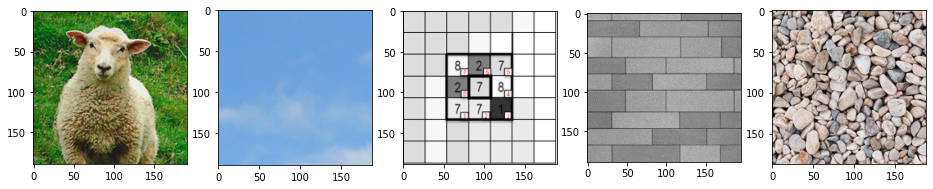

In [2]:
images = list()
gray_images = list()
images_path = "./img/"
for img_name in os.listdir(images_path):
    image = cv.imread(images_path + img_name, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    images.append(image)
    gray_images.append(gray)
    
f, ax = plt.subplots(1,5)
for i, img in enumerate(images):
    ax[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)

In [3]:
def calute_lbp(image_array,i,j):
    binary_pattern=[]
    borders_list = [image_array[i-1,j-1:j+2], 
             image_array[i,j+1:j+2], 
             image_array[i+1,j-1:j+2][::-1], 
             image_array[i,j-1:j]]
    borders = np.concatenate(borders_list)
    for num in borders:
        if num > image_array[i,j]:
            binary_pattern.append(1)
        else:
            binary_pattern.append(0)
    return binary_pattern
            
    
def lbp(image):
    lbp_array = np.zeros(image.shape, np.uint8)
    width = image.shape[0]
    height = image.shape[1]
    for i in range(1, width-1):
        for j in range(1, height-1):
            binary_pattern = calute_lbp(image,i,j)
            bit_num = 0
            result = 0
            for s in binary_pattern:
                result += s << bit_num
                bit_num += 1
            lbp_array[i,j] = result
    return lbp_array

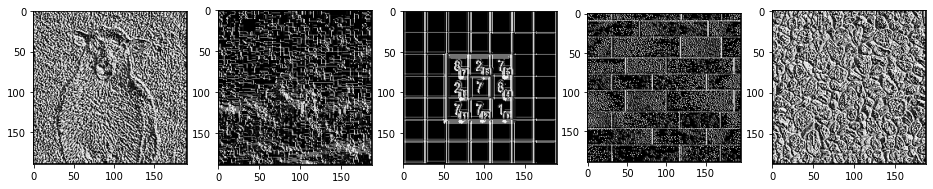

In [4]:
f, ax = plt.subplots(1,5)
i = 0
lbps = list()
for gray_img in gray_images:
    lpb_image = lbp(gray_img)
    lbps.append(lpb_image)
    ax[i].imshow(lpb_image, cmap="gray")
    i += 1

plt.show()

## Realizar el histograma de características LBP de la imagen

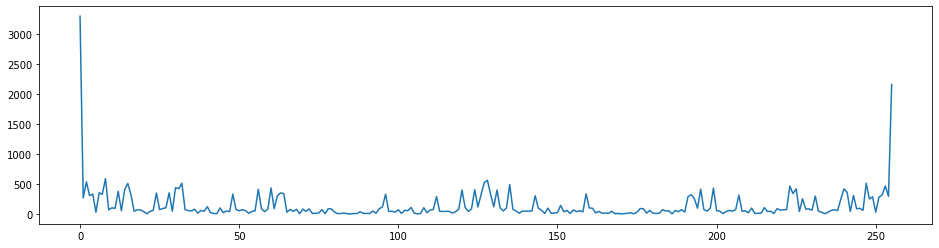

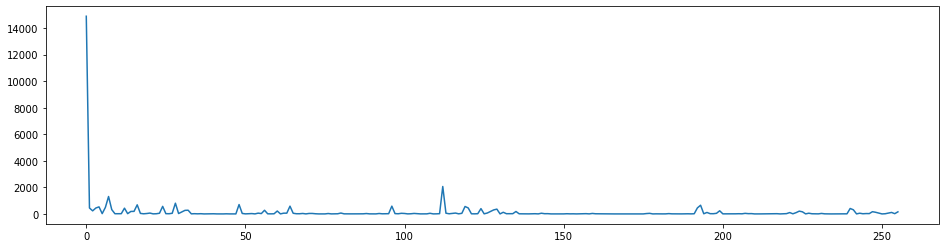

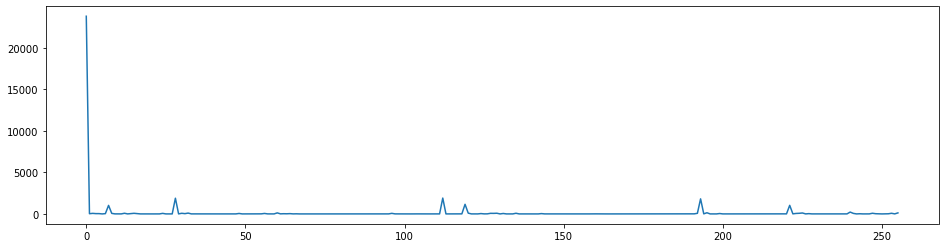

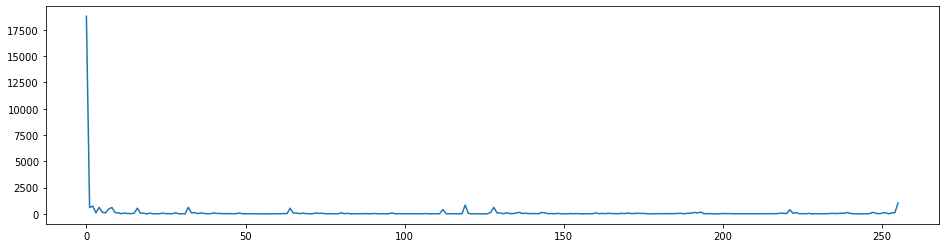

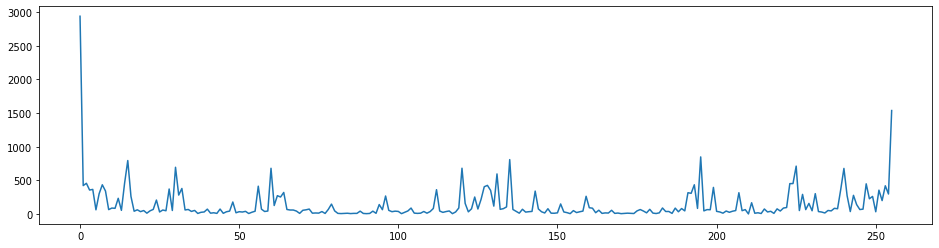

In [5]:
matplotlib.rcParams['figure.figsize'] = (16.0, 4.0)
for lbp_img in lbps:
    hist = cv.calcHist([lbp_img],[0],None,[256],[0,256])
    plt.plot(hist)
    plt.show()

## Comparar los histogramas

En los histogramas se observa que en LBP la mayoría de los pixeles tienen valores en 0 (negro), pero si no hay un patrón uniforme en la imagen, los cambios en las diferentes texturas empiezan a tener otros valores intermedios. Podría decir que entre más textura tiene una imagen, más "balanceado" está el histograma.